In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
df=pd.read_csv("/content/train_qnU1GcL.csv")

In [0]:
df2=pd.read_csv("/content/test_LxCaReE_DvdCKVT_v2s0Z4r.csv")

In [4]:
print("shape of train dataset is", df.shape)
print("shape of test dataset is", df2.shape)

shape of train dataset is (79853, 12)
shape of test dataset is (34224, 11)


In [5]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [6]:
df2.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [0]:
# target is dependent/target variable which we have to predict for test dataset

In [0]:
train=df.copy()

In [0]:
test=df2.copy()

In [0]:
# data exploration of train dataset

In [11]:
df.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [12]:
df.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
id                                  79853 non-null int64
perc_premium_paid_by_cash_credit    79853 non-null float64
age_in_days                         79853 non-null int64
Income                              79853 non-null int64
Count_3-6_months_late               79756 non-null float64
Count_6-12_months_late              79756 non-null float64
Count_more_than_12_months_late      79756 non-null float64
application_underwriting_score      76879 non-null float64
no_of_premiums_paid                 79853 non-null int64
sourcing_channel                    79853 non-null object
residence_area_type                 79853 non-null object
target                              79853 non-null int64
dtypes: float64(5), int64(5), object(2)
memory usage: 7.3+ MB


In [14]:
df.isnull().sum()  # we have null values in three columns & we need to impute these usimng median

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [0]:
median1=df['Count_3-6_months_late'].median()

In [0]:
df['Count_3-6_months_late']=df['Count_3-6_months_late'].fillna(median1)

In [0]:
median2=df['Count_6-12_months_late'].median()

In [0]:
df['Count_6-12_months_late']=df['Count_6-12_months_late'].fillna(median2)

In [0]:
median4=df['Count_more_than_12_months_late'].median()

In [0]:
df['Count_more_than_12_months_late']=df['Count_more_than_12_months_late'].fillna(median4)

In [0]:
median3=df['application_underwriting_score'].median()

In [0]:
df['application_underwriting_score']=df['application_underwriting_score'].fillna(median3)

In [23]:
df.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [24]:
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248369,0.078093,0.059935,99.072606,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691102,0.436251,0.311840,0.726395,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.830000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.520000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [25]:
df['sourcing_channel'].value_counts()  # 5 categories of this variable which we need to conevrt into dummy variables

A    43134
B    16512
C    12039
D     7559
E      609
Name: sourcing_channel, dtype: int64

In [0]:
#df['sourcing_channel'].value_counts(normalize=True)

In [27]:
df['residence_area_type'].value_counts()  # 2 categories of this variable which we need to conevrt into dummy variables

Urban    48183
Rural    31670
Name: residence_area_type, dtype: int64

In [28]:
df['residence_area_type'].value_counts(normalize=True) 

Urban    0.603396
Rural    0.396604
Name: residence_area_type, dtype: float64

In [0]:
# UNIVARIATE ANALYSIS

Text(0,0.5,'Count of sourcing channels')

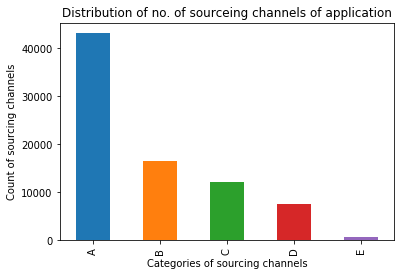

In [30]:
source_channel_plot=df['sourcing_channel'].value_counts().plot.bar()
plt.title("Distribution of no. of sourceing channels of application")
plt.xlabel("Categories of sourcing channels")
plt.ylabel("Count of sourcing channels")   # proportion of source channel A is highest as compared to others & E has negligible response towards this

Text(0,0.5,'Count of applications')

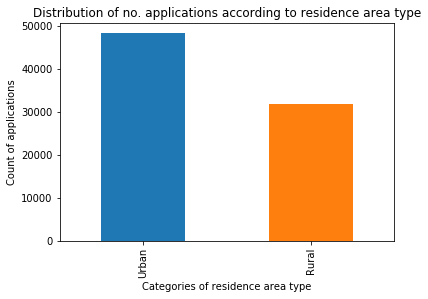

In [31]:
res_area_plot=df['residence_area_type'].value_counts().plot.bar()
plt.title("Distribution of no. applications according to residence area type")
plt.xlabel("Categories of residence area type")
plt.ylabel("Count of applications")   # proportion of urban areas application is high as compared to rural

Text(0,0.5,'Count of premiums')

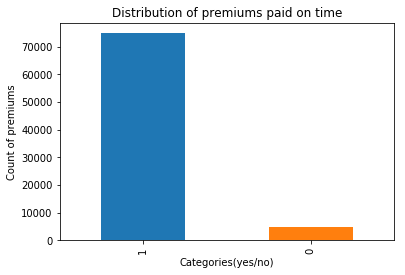

In [32]:
target_plot=df['target'].value_counts().plot.bar()
plt.title("Distribution of premiums paid on time")
plt.xlabel("Categories(yes/no)")
plt.ylabel("Count of premiums")  # Lets see the distribution of target varibale, which is showing that maximum no. of applicants have paid premium on time and proportion of applicants who have not paid on time is very very less.

In [0]:
#  BIVARIATE ANALYSIS

In [34]:
source_channel_target=pd.crosstab(df['sourcing_channel'],df['target'])
source_channel_target

target,0,1
sourcing_channel,,
A,2349,40785
B,1066,15446
C,903,11136
D,634,6925
E,46,563


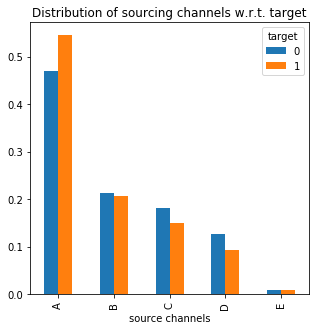

In [35]:
source_channel_target.div(source_channel_target.sum().astype(float)).plot(kind='bar', figsize=(5,5))
plt.title("Distribution of sourcing channels w.r.t. target")
plt.xlabel("source channels")
plt.show()   # in Channel A no. of applicants are more who have paid premium on time as compared to those who have not paid on time.But in other channels proportions are almost same for both type of applicants.
#So we can't infer much information from below graph

In [36]:
res_area_target=pd.crosstab(df['residence_area_type'],df['target'])
res_area_target

target,0,1
residence_area_type,,
Rural,1998,29672
Urban,3000,45183


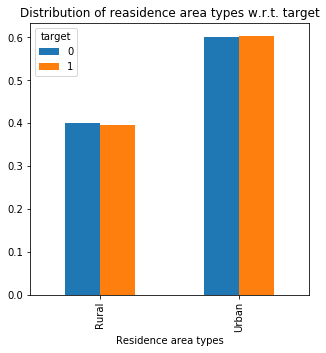

In [37]:
res_area_target.div(res_area_target.sum().astype(float)).plot(kind='bar', figsize=(5,5))
plt.title("Distribution of reasidence area types w.r.t. target")
plt.xlabel("Residence area types")
plt.show()   # we can't infer any information from below graph because the proportion of areas w.r.t target is same.

In [0]:
# Nnow lets visualize numerical independent features w.r.t. to target variable
#id                                    
#1. perc_premium_paid_by_cash_credit      
#2. age_in_days                           
#3. Income                                
#4. Count_3-6_months_late                 
#5. Count_6-12_months_late                
#6 Count_more_than_12_months_late        
#7. application_underwriting_score      
#8. no_of_premiums_paid                    

In [39]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [40]:
perc_prem_target=df.groupby("target")['perc_premium_paid_by_cash_credit'].mean()
perc_prem_target

target
0    0.626626
1    0.293433
Name: perc_premium_paid_by_cash_credit, dtype: float64

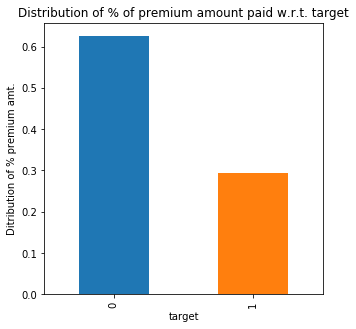

In [41]:
perc_prem_target.plot(kind="bar", figsize=(5,5))
plt.title("Distribution of % of premium amount paid w.r.t. target")
plt.xlabel("target")
plt.ylabel("Ditribution of % premium amt.")
plt.show()
# It can be inferred that if percentage of premium amount paid is more then it would not be poaid on time but if percenyage of premium amount oaid is less then it would be paid on time.

In [42]:
age_target=df.groupby("target")['age_in_days'].mean()
age_target

target
0    16929.642657
1    18974.696867
Name: age_in_days, dtype: float64

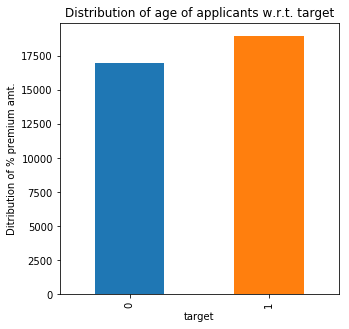

In [43]:
age_target.plot(kind="bar", figsize=(5,5))
plt.title("Distribution of age of applicants w.r.t. target")
plt.xlabel("target")
plt.ylabel("Ditribution of % premium amt.")
plt.show() # since grapgh is not showing margin between both categories of target as per age so we have to create bins to infer some inmformation


In [44]:
df['age_in_days'].min()

7670

In [45]:
df['age_in_days'].max()

37602

In [0]:
bins=[7000,20000,30000,40000]
groups=['Low','Medium', 'High']

In [47]:
df['age_Bin']=pd.cut(df['age_in_days'],bins,labels=groups)
age_Bin=pd.crosstab(df['age_Bin'], df['target'])
age_Bin

target,0,1
age_Bin,,
Low,3754,43107
Medium,1211,30354
High,33,1394


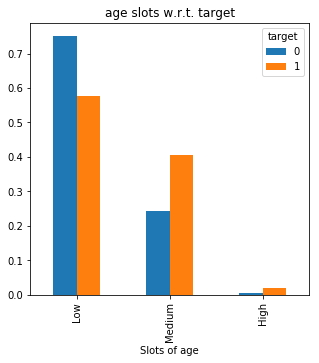

In [48]:
age_Bin.div(age_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("age slots w.r.t. target")
plt.xlabel("Slots of age")
plt.show()

In [0]:
# Now its more clear that in low range age, no. of applicants are more who have not paid premium on time.In medium & high ranges, no. of applicants are more who paid prem on time

In [50]:
income_target=df.groupby("target")['Income'].mean()
income_target

target
0    177058.799520
1    210969.651727
Name: Income, dtype: float64

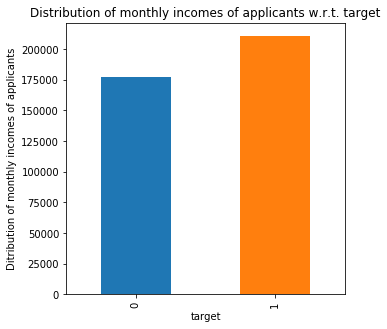

In [51]:
income_target.plot(kind="bar", figsize=(5,5))
plt.title("Distribution of monthly incomes of applicants w.r.t. target")
plt.xlabel("target")
plt.ylabel("Ditribution of monthly incomes of applicants")
plt.show()

In [0]:
# again its not clear distribution from which we can infer some info. we have to create bins

In [53]:
df['Income'].min()

24030

In [54]:
df['Income'].max()

90262600

In [0]:
bins=[20000,20000000,50000000,100000000]
groups=['Low','Medium', 'High']

In [56]:
df['income_Bin']=pd.cut(df['Income'],bins,labels=groups)
income_Bin=pd.crosstab(df['income_Bin'], df['target'])
income_Bin

target,0,1
income_Bin,,
Low,4998,74848
Medium,0,5
High,0,2


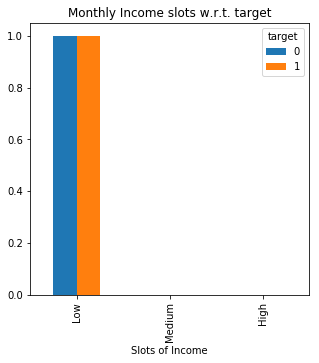

In [57]:
income_Bin.div(income_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("Monthly Income slots w.r.t. target")
plt.xlabel("Slots of Income")
plt.show()

In [58]:
score_target=df.groupby("target")['application_underwriting_score'].mean()
score_target

target
0    98.883852
1    99.085209
Name: application_underwriting_score, dtype: float64

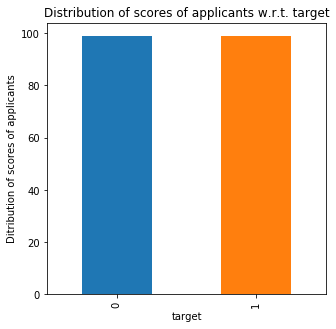

In [59]:
score_target.plot(kind="bar", figsize=(5,5))
plt.title("Distribution of scores of applicants w.r.t. target")
plt.xlabel("target")
plt.ylabel("Ditribution of scores of applicants")
plt.show()

In [0]:
# no info here, need to create bins here

In [61]:
df['application_underwriting_score'].min()

91.9

In [62]:
df['application_underwriting_score'].max()

99.89

In [0]:
bins=[91,93,95,98,100] # Its also given that less than 90 scores will not be considered 
groups=['Low','Medium', 'High','Very High']

In [64]:
df['score_Bin']=pd.cut(df['application_underwriting_score'],bins,labels=groups)
score_Bin=pd.crosstab(df['score_Bin'], df['target'])
score_Bin

target,0,1
score_Bin,,
Low,4,63
Medium,26,232
High,555,4144
Very High,4413,70416


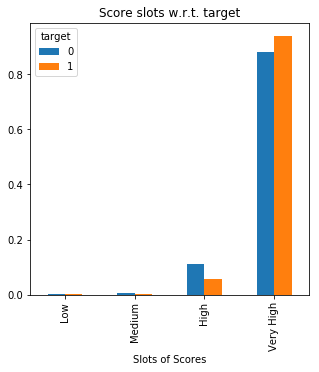

In [65]:
score_Bin.div(score_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("Score slots w.r.t. target")
plt.xlabel("Slots of Scores")
plt.show()

In [0]:
#In slot of score 95-98, more applicants are present who have not paud premium on time, but in slot of 98-100 score, applicants are more likely to pay premium on time

In [67]:
prem_paid_target=df.groupby("target")['no_of_premiums_paid'].mean()
prem_paid_target

target
0    10.410364
1    10.894169
Name: no_of_premiums_paid, dtype: float64

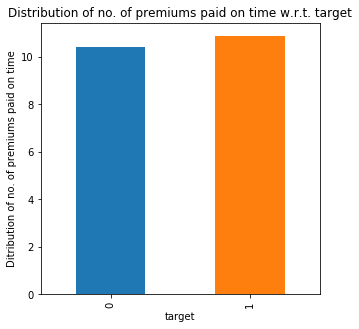

In [68]:
prem_paid_target.plot(kind="bar", figsize=(5,5))
plt.title("Distribution of no. of premiums paid on time w.r.t. target")
plt.xlabel("target")
plt.ylabel("Ditribution of no. of premiums paid on time")
plt.show()

In [0]:
# Need to create bins as no insight can be inferred from this

In [70]:
df['no_of_premiums_paid'].min()

2

In [71]:
df['no_of_premiums_paid'].max()

60

In [0]:
bins=[0,15,30,45,65] 
groups=['Low','Medium','High','Very High']

In [73]:
df['prem_paid_Bin']=pd.cut(df['no_of_premiums_paid'],bins,labels=groups)
prem_paid_Bin=pd.crosstab(df['prem_paid_Bin'], df['target'])
prem_paid_Bin

target,0,1
prem_paid_Bin,,
Low,4119,62754
Medium,853,11795
High,22,281
Very High,4,25


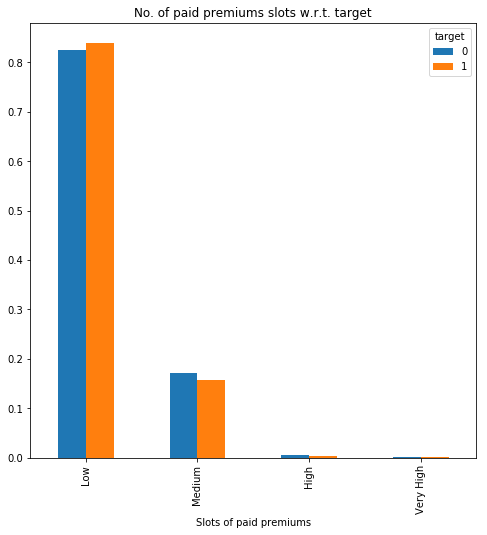

In [74]:
prem_paid_Bin.div(prem_paid_Bin.sum().astype(float)).plot(kind="bar", figsize=(8,8))
plt.title("No. of paid premiums slots w.r.t. target")
plt.xlabel("Slots of paid premiums")
plt.show()

In [0]:
#4. Count_3-6_months_late                 
#5. Count_6-12_months_late                
#6 Count_more_than_12_months_late   

In [0]:
#plt.bar(df['Count_3-6_months_late'], df['Count_6-12_months_late'],df['Count_more_than_12_months_late'])
#plt.show()

In [77]:
print(df['Count_3-6_months_late'].min())
print(df['Count_3-6_months_late'].max())

0.0
13.0


In [78]:
print(df['Count_6-12_months_late'].min())
print(df['Count_6-12_months_late'].max())

0.0
17.0


In [79]:
print(df['Count_more_than_12_months_late'].min())
print(df['Count_more_than_12_months_late'].max())

0.0
11.0


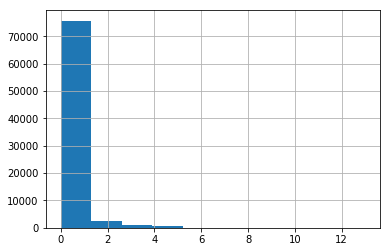

In [80]:
df['Count_3-6_months_late'].hist()
plt.show()

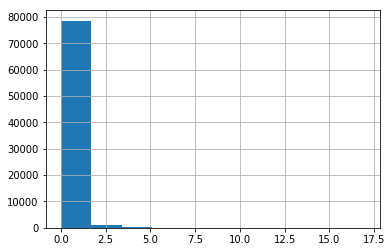

In [81]:
df['Count_6-12_months_late'].hist()
plt.show()

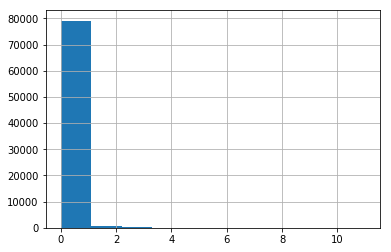

In [82]:
df['Count_more_than_12_months_late'].hist()
plt.show()

In [0]:
# Lets see correlation between various variables

In [0]:
matrix=df.corr()

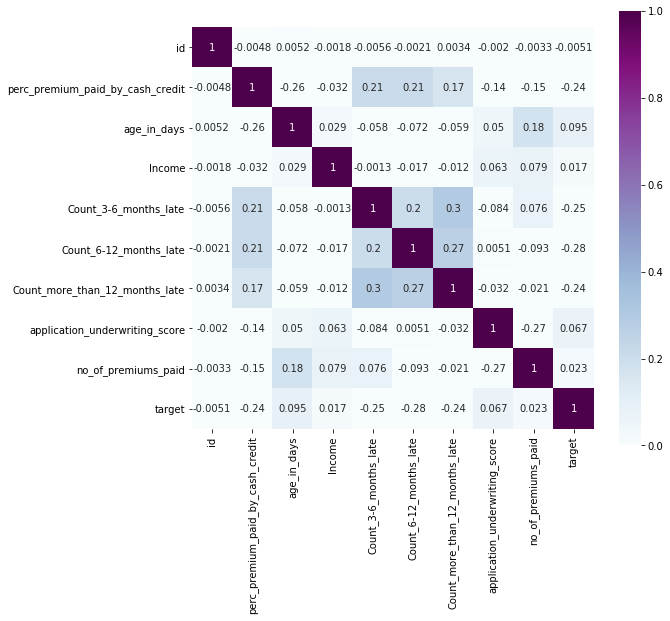

In [85]:
relation=plt.subplots(figsize=(9,8))
sns.heatmap(matrix, square=True, cmap="BuPu", vmin=0.0, vmax= 1.0, annot=True)

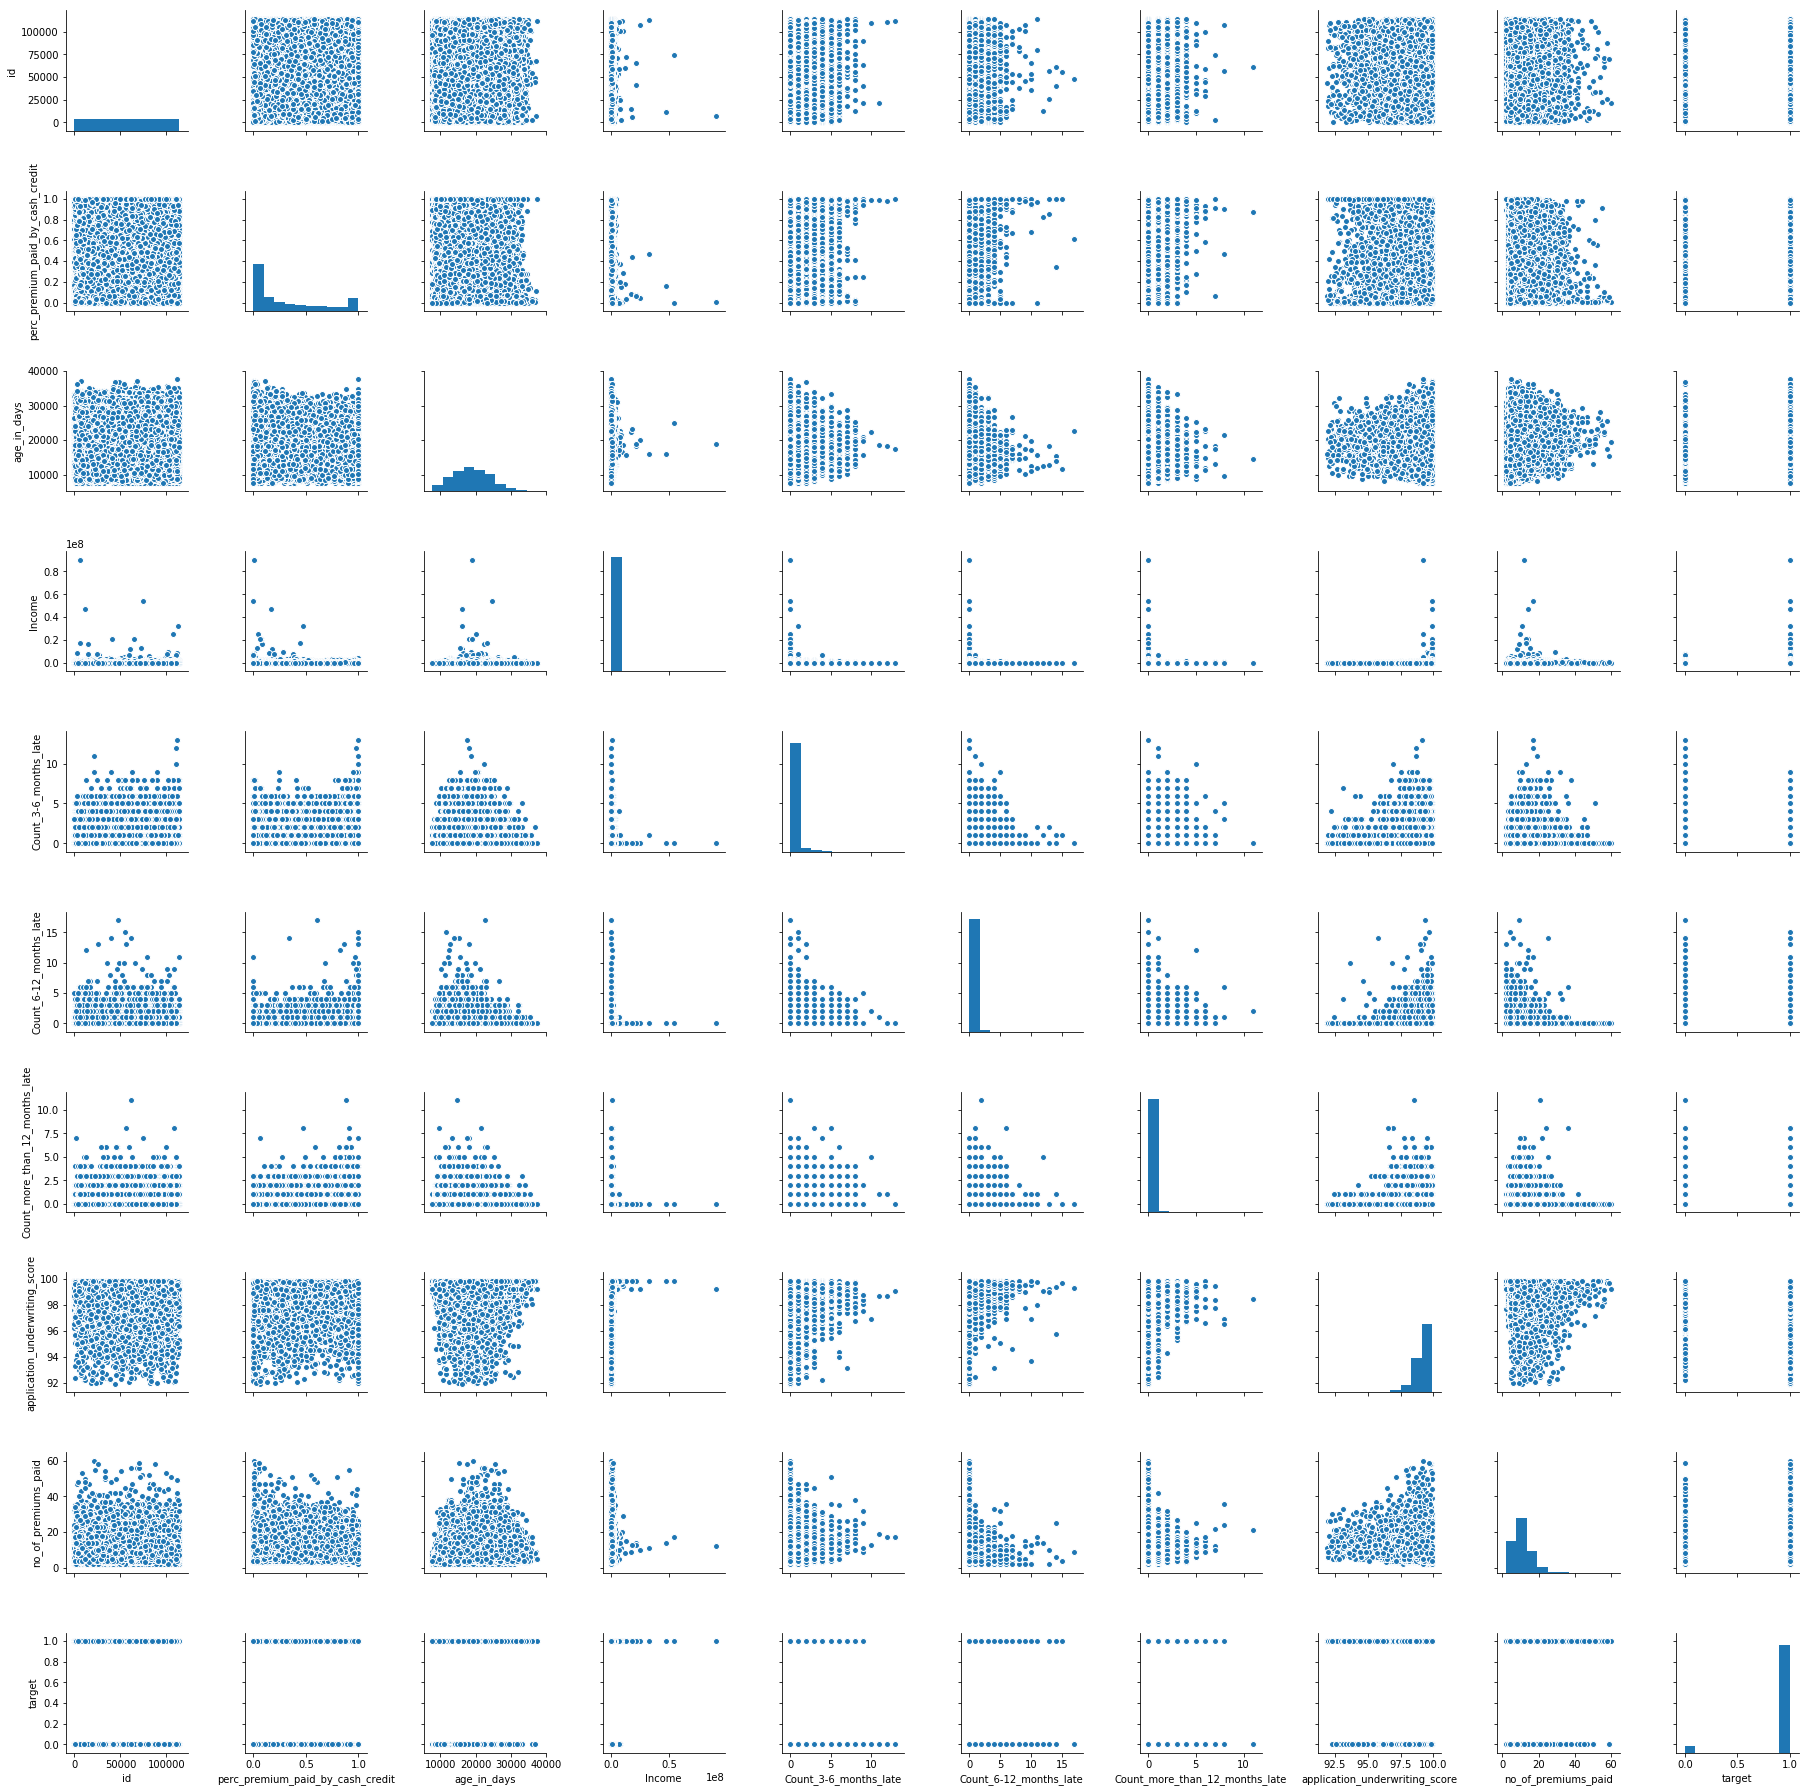

In [86]:
sns.pairplot(df)

In [87]:
df.columns # during data exploration, we have made extra columns but now we have remove those for further rpocessing

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target', 'age_Bin', 'income_Bin', 'score_Bin', 'prem_paid_Bin'],
      dtype='object')

In [0]:
df=df.drop(['age_Bin', 'income_Bin', 'score_Bin', 'prem_paid_Bin'], axis=1)

In [89]:
df.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [90]:
df.shape

(79853, 12)

In [0]:
# Now we have our train dataset without any null value but need to process few things mentioned below:
# we have treat following first before applying machine learning:

#1. categorical to dummy variables(2 variables)
#2. outliers treatmeant
#3. feature selection
#4. standardization/normalization

In [92]:
df.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [0]:
df['sourcing_channel'].replace('A', 1,inplace=True)
df['sourcing_channel'].replace('B', 2,inplace=True)
df['sourcing_channel'].replace('C', 3,inplace=True)
df['sourcing_channel'].replace('D', 4,inplace=True)
df['sourcing_channel'].replace('E', 5,inplace=True)

df['residence_area_type'].replace('Rural', 0,inplace=True)
df['residence_area_type'].replace('Urban', 1,inplace=True)

In [94]:
df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,3,1,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,1,1,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,3,0,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,1,1,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,2,1,1


In [95]:
df['sourcing_channel'].value_counts() # where A,B,C,D,E representing 1,2,3,4,5 respectively

1    43134
2    16512
3    12039
4     7559
5      609
Name: sourcing_channel, dtype: int64

In [96]:
df['residence_area_type'].value_counts() # where 0.1 represents rural and urban respectively

1    48183
0    31670
Name: residence_area_type, dtype: int64

In [97]:
df.dtypes  # now all data is numerical which is neede for mahcine learning

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                      int64
residence_area_type                   int64
target                                int64
dtype: object

In [0]:
# 2. outlier treatment

In [99]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)  # deriving interquartile range for all variables

id                                   56992.000
perc_premium_paid_by_cash_credit         0.504
age_in_days                           7662.000
Income                              144080.000
Count_3-6_months_late                    0.000
Count_6-12_months_late                   0.000
Count_more_than_12_months_late           0.000
application_underwriting_score           0.690
no_of_premiums_paid                      7.000
sourcing_channel                         2.000
residence_area_type                      1.000
target                                   0.000
dtype: float64


In [0]:
outliers=(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))  #applying OR logical gate with IQR & outlier stats formula

In [101]:
outliers.apply(pd.value_counts)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
False,79853.0,79853.0,79809,76425,66898,75928,76135,76069,78427,79853.0,79853.0,74855
True,NaN,NaN,44,3428,12955,3925,3718,3784,1426,NaN,NaN,4998


In [0]:
# Now we know whre outliers lie, so we can visualize them using boxplots

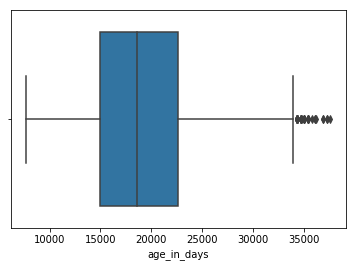

In [103]:
sns.boxplot(x=df['age_in_days'])

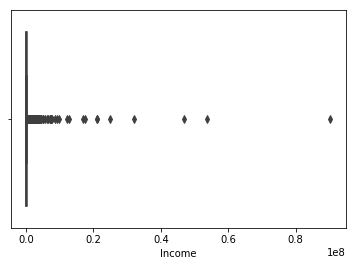

In [104]:
sns.boxplot(x=df['Income'])

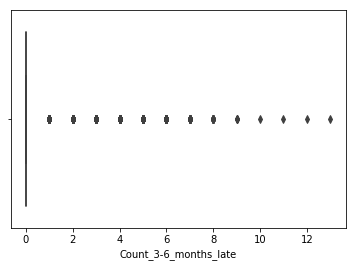

In [105]:
sns.boxplot(x=df['Count_3-6_months_late'])

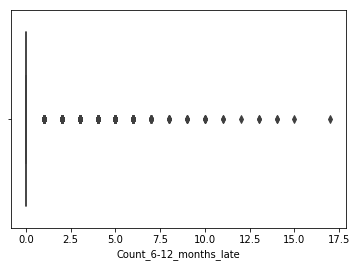

In [106]:
sns.boxplot(x=df['Count_6-12_months_late'])

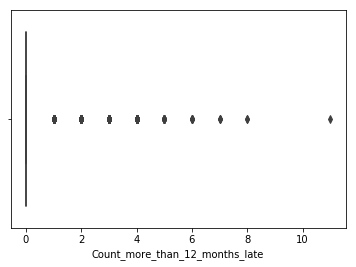

In [107]:
sns.boxplot(x=df['Count_more_than_12_months_late'])

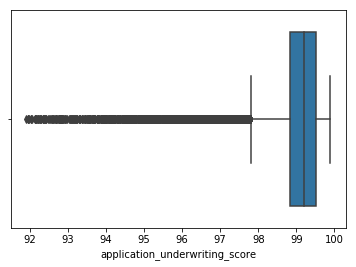

In [108]:
sns.boxplot(x=df['application_underwriting_score'])

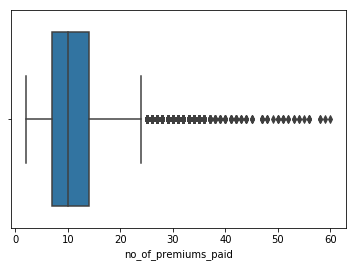

In [109]:
sns.boxplot(x=df['no_of_premiums_paid'])

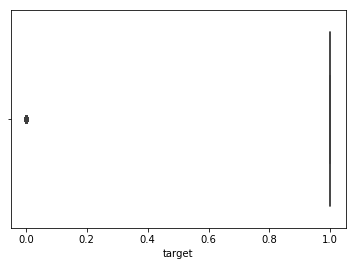

In [110]:
sns.boxplot(x=df['target'])

In [0]:
# There are many outliers in multiple variables

In [314]:
df.shape

(79853, 12)

In [0]:
#df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#df_out.shape

In [339]:
df.shape

(79853, 12)

In [0]:
# lets define train features and labels for further processing

In [340]:
train_features=df.drop(['target'], axis=1) # creating features data
train_features.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,3,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,1,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,3,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,1,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,2,1


In [341]:
train_labels=df['target']  # crrating label data 
train_labels.head()

0    1
1    1
2    0
3    1
4    1
Name: target, dtype: int64

In [342]:
train_features.shape

(79853, 11)

In [0]:
# The FeatureSelector includes some of the most common feature selection methods:
#1. Features with a high percentage of missing values
#2. Collinear (highly correlated) features
#3. Features with zero importance in a tree-based model
#4. Features with low importance
#5. Features with a single unique value

In [344]:
!pip install feature_selector

In [0]:
from feature_selector import FeatureSelector
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = train_features, labels = train_labels)

In [346]:
# 1. missing values, but we have data without any missing value so just to confirm this:
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



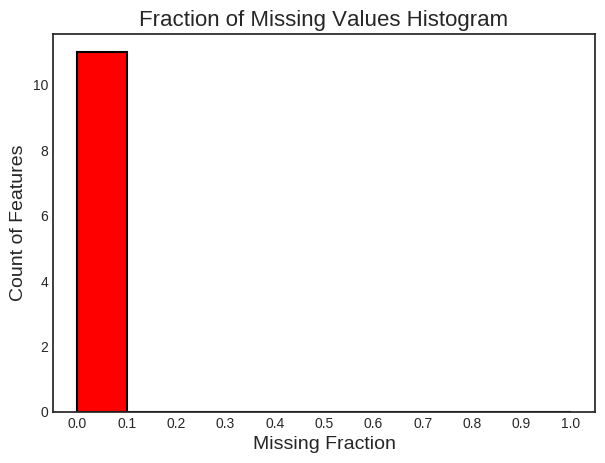

In [347]:
fs.plot_missing()

In [0]:
# 2. Collinear features are features that are highly correlated with one another. In machine learning, these lead to decreased generalization performance on the test set due to high variance and less model interpretability.
# The identify_collinear method finds collinear features based on a specified correlation coefficient value. For each pair of correlated features, it identifies one of the features for removal (since we only need to remove one):

In [349]:
fs.identify_collinear(correlation_threshold = 0.98)

0 features with a correlation magnitude greater than 0.98.



In [0]:
#3.  Zero Importance Features: The identify_zero_importance function finds features that have zero importance according to a gradient boosting machine (GBM) learning model.

In [351]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[177]	valid_0's auc: 0.847148
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[168]	valid_0's auc: 0.839974
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[97]	valid_0's auc: 0.854246
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[181]	valid_0's auc: 0.834527
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[108]	valid_0's auc: 0.835581
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[105]	valid_0's auc: 0.851823
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[187]	valid_0's auc: 0.83033
Training until validation scores don't improve for 100 rounds.
Early sto

In [0]:
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

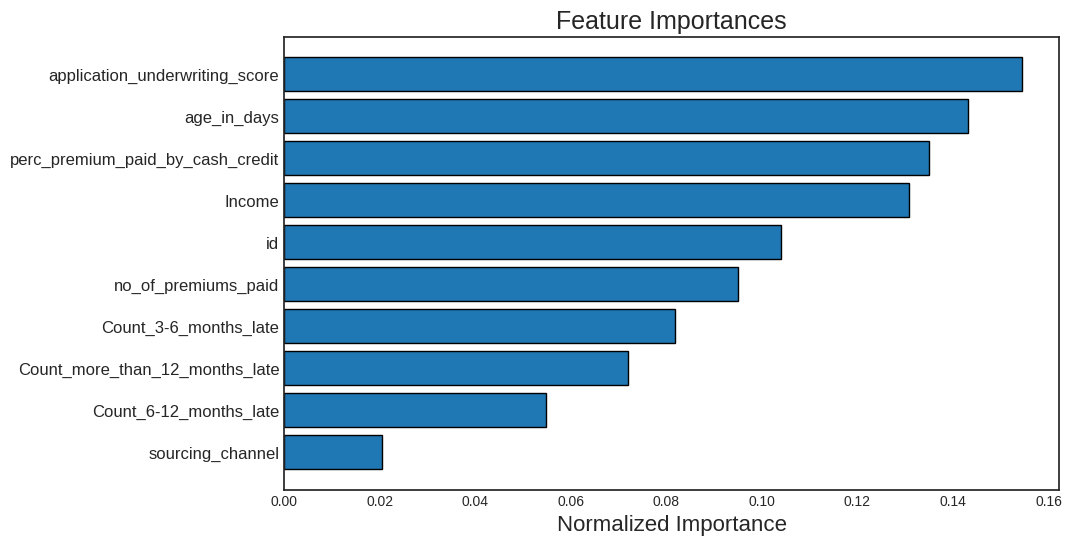

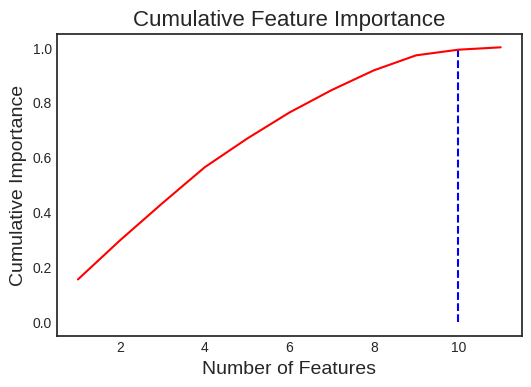

10 features required for 0.99 of cumulative importance


In [353]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [0]:
#4. Low Importance Features: The function identify_low_importance finds the lowest importance features that do not contribute to a specified total importance.

In [355]:
fs.identify_low_importance(cumulative_importance = 0.99)

9 features required for cumulative importance of 0.99 after one hot encoding.
2 features do not contribute to cumulative importance of 0.99.



In [356]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,application_underwriting_score,699.3,0.154473,0.154473
1,age_in_days,647.6,0.143053,0.297526
2,perc_premium_paid_by_cash_credit,610.9,0.134946,0.432472
3,Income,591.7,0.130705,0.563176
4,id,471.1,0.104065,0.667241
5,no_of_premiums_paid,430.1,0.095008,0.762249
6,Count_3-6_months_late,370.4,0.081820,0.844069
7,Count_more_than_12_months_late,326.0,0.072012,0.916081
8,Count_6-12_months_late,247.7,0.054716,0.970797
9,sourcing_channel,92.9,0.020521,0.991319


In [0]:
# The feature importance based methods are really only applicable if we are going to use a tree-based model for making predictions. Besides being stochastic, the importance-based methods are a black-box approach in that we don’t really know why the model considers the features to be irrelevant. If using these methods, run them several times to see how the results change, and perhaps create multiple datasets with different parameters to test!

In [0]:
# 5. Single Unique Value Features: A feature with only one unique value cannot be useful for machine learning because this feature has zero variance.

In [359]:
fs.identify_single_unique()

0 features with a single unique value.



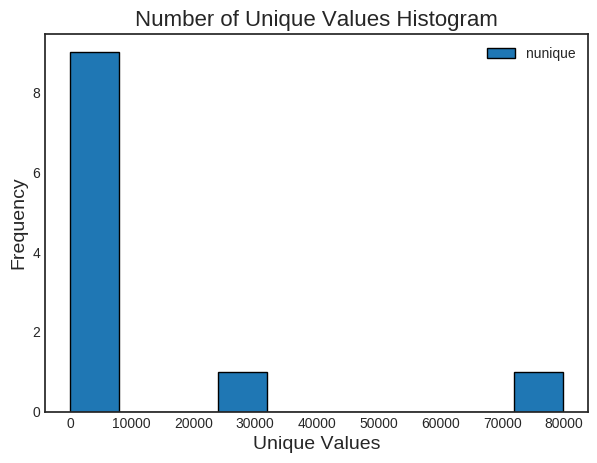

In [360]:
fs.plot_unique()

In [361]:
# Alternative if we want to do all these 5 methods at once to remove unwanted features
fs.identify_all(selection_params = {'missing_threshold': 0.6,    
                                    'correlation_threshold': 0.98, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

0 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[137]	valid_0's auc: 0.834866
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[80]	valid_0's auc: 0.840454
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[102]	valid_0's auc: 0.832282
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[94]	valid_0's auc: 0.842622
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[105]	valid_0's auc: 0.831059
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[80]	valid_0's auc: 0.848723
Training until validation scores don't improve for

In [362]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'collinear', 'zero_importance', 'low_importance', 'single_unique'] methods have been run

Removed 2 features including one-hot features.


In [404]:
train_removed_all.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid'],
      dtype='object')

In [0]:
# Its time for standardization

In [364]:
from sklearn.preprocessing import MinMaxScaler
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the training data
scaler.fit(train_removed_all)
# Transform both the training and testing data
X = scaler.transform(train_removed_all)
print(X)

[[0.97247401 0.429      0.14659896 ... 0.         0.89111389 0.18965517]
 [0.36371128 0.01       0.46358412 ... 0.         1.         0.32758621]
 [0.27436576 0.917      0.32944675 ... 0.09090909 0.84981227 0.0862069 ]
 ...
 [0.67542122 0.         0.52458907 ... 0.         0.87484355 0.17241379]
 [0.58929292 0.398      0.50016705 ... 0.         0.8485607  0.10344828]
 [0.62704034 0.55       0.26857544 ... 0.09090909 0.99374218 0.10344828]]


In [0]:
# Machine learning time

In [0]:
# Import train_test_split function
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, train_labels, train_size = 0.7, test_size=0.3,random_state=100) # 70% training and 30% test

In [0]:
from sklearn.naive_bayes import GaussianNB

In [477]:
model3= GaussianNB()
model3.fit(X_train, y_train)

GaussianNB(priors=None)

In [0]:
y_pred3=model3.predict(X_test)

In [479]:
y_pred3

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
# Model Evaluation using Confusion Matrix
# A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [0]:
from sklearn import metrics

In [482]:
cnf_matrix=metrics.confusion_matrix(y_test, y_pred3)
cnf_matrix

array([[  662,   799],
       [ 1469, 21026]])

In [0]:
#Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.
#So here 662, 21026 are correct predictions for binary outcome(0,1) and 799,1469 are incorrect predictions which is good and prooves model to be efficient enough for predictions.
#Visualizing Confusion Matrix using Heatmap

Text(0.5,35.5833,'Predicted label')

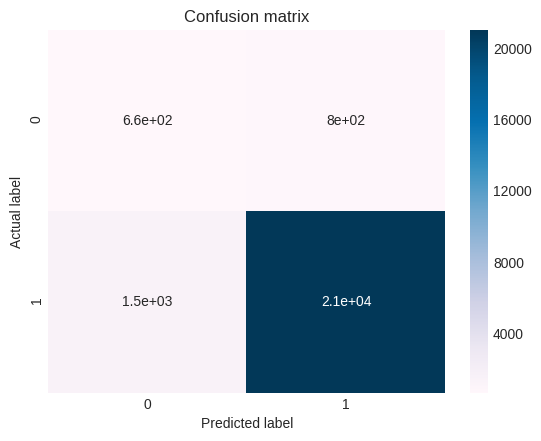

In [489]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

### create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='PuBu')
ax.xaxis.set_label_position("bottom")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
# Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [491]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Precision:",metrics.precision_score(y_test, y_pred3))
print("Recall:",metrics.recall_score(y_test, y_pred3))

Accuracy: 0.905326431791618
Precision: 0.9633906071019473
Recall: 0.9346965992442765


In [0]:
# classification rate of 90.53%, considered as good accuracy.
# 96.33% of precision is showing that our madel can measure correctness of premium paid on time
# Recall percentage of 93.47% inferred the measure of actual abservations of premium paid on time which are predicted correctly.
# ROC Curve
# Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

In [493]:
y_test.shape

(23956,)

In [494]:
y_pred3.shape

(23956,)

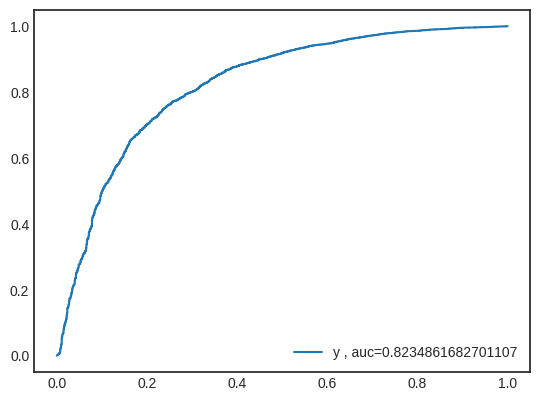

In [495]:
y_pred3_proba = model3.predict_proba(X_test)[::,1]
fpr, tpr, _  = metrics.roc_curve(y_test,  y_pred3_proba)
auc = metrics.roc_auc_score(y_test, y_pred3_proba)
plt.plot(fpr, tpr, label="y , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
#Predictions on test data

In [497]:
df2.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19
2,70762,1.000,17170,186030,0.0,0.0,0.0,99.21,2
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14


In [498]:
df2.shape

(34224, 9)

In [499]:
df2.isnull().sum() # impute missing values as we have done train data set

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
dtype: int64

In [0]:
df2['Count_3-6_months_late']=df2['Count_3-6_months_late'].fillna(df2['Count_3-6_months_late'].median())

In [0]:
df2['Count_6-12_months_late']=df2['Count_6-12_months_late'].fillna(df2['Count_6-12_months_late'].median())

In [0]:
df2['Count_more_than_12_months_late']=df2['Count_more_than_12_months_late'].fillna(df2['Count_more_than_12_months_late'].median())

In [0]:
df2['application_underwriting_score']=df2['application_underwriting_score'].fillna(df2['application_underwriting_score'].median()) 

In [504]:
df2.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
dtype: int64

In [505]:
df2.dtypes 

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
dtype: object

In [506]:
Z.shape

(34224, 9)

In [0]:
#now we need to delete two columns from this dataset whihc are not present train dataset

In [508]:
df2.shape

(34224, 9)

In [509]:
from sklearn.preprocessing import MinMaxScaler
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the training data
scaler.fit(df2)
# Transform both the training and testing data
Z = scaler.transform(df2)
print(Z)

[[0.00568042 0.001      0.70118091 ... 0.         1.         0.0877193 ]
 [0.71123637 0.124      0.57138792 ... 0.         0.87984981 0.29824561]
 [0.62029699 1.         0.33787437 ... 0.         0.91489362 0.        ]
 ...
 [0.57635261 0.325      0.37678737 ... 0.         0.83604506 0.21052632]
 [0.57580034 0.983      0.32464253 ... 0.14285714 0.87359199 0.14035088]
 [0.822478   0.005      0.59742477 ... 0.         0.76345432 0.15789474]]


In [0]:
predictions = model3.predict(Z)

In [514]:
predictions.shape

(34224,)

In [515]:
predictions

array([1, 1, 1, ..., 1, 0, 1])

In [516]:
col1=df2['id']
col1.head()

0      649
1    81136
2    70762
3    53935
4    15476
Name: id, dtype: int64

In [517]:
col2=pd.DataFrame(predictions, columns=['target'])
col2.head()

,target
0,1
1,1
2,1
3,1
4,1


In [518]:
print(col1.shape)
print(col2.shape)

(34224,)
(34224, 1)


In [0]:
sub = pd.concat([col1, col2], axis=1)

In [520]:
sub.head()

,id,target
0,649,1
1,81136,1
2,70762,1
3,53935,1
4,15476,1


In [521]:
print("submission dataset shape is" ,sub.shape)
print("submission dataset column names are is" ,sub.columns)

submission dataset shape is (34224, 2)
submission dataset column names are is Index(['id', 'target'], dtype='object')


In [522]:
sub.isnull().sum()

id        0
target    0
dtype: int64

In [523]:
sub.values.flatten()  # convert all values into an flat array
sum(n < 0 for n in sub.values.flatten())  # checking for any negative value in final dataframe, because sales cant be negative

0

In [0]:
# Now our final submission has no negative value, no missing value and with proper size what we want.
# Lets convert final submission into csv format to submit

In [525]:
import base64
from IPython.display import HTML

def create_download_link( sub, title = "Download CSV file", filename = "submission.csv"):  
    csv = sub.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(sub)